In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


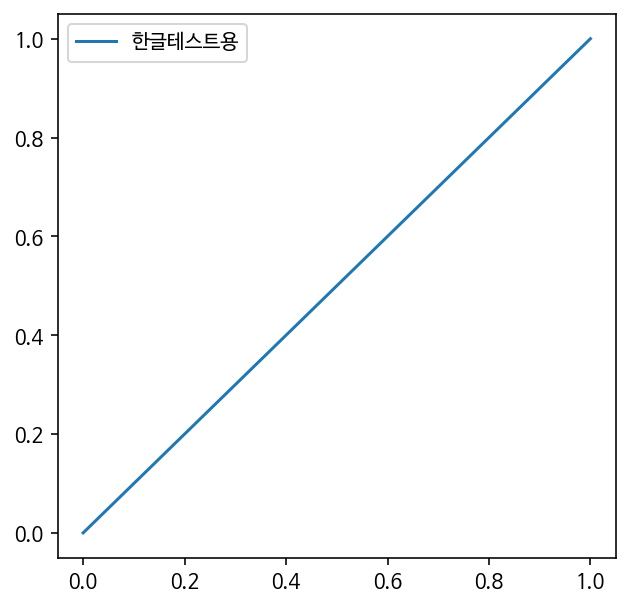

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1], label='한글테스트용')
plt.legend()

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('./프로그램운영목적.csv', encoding='cp949')
df

,프로그램 운영목적 일련번호,프로그램 문서 일련번호,항목 출력 순서,프로그램 운영목적 내용
0,PRGRM_OPRTN_PRPS_CONNO,PRGRM_DCMNT_CONNO,IEM_OTPT_ORDR,PRGRM_OPRTN_PRPS_CONT
1,PU_00000000000000011,D_000000000000000026,0,"숲의 다양한 산림치유인자를 활용함으로써 청소년의 정서적 안정을 돕고, 협동 활동을 ..."
2,PU_00000000000000012,D_000000000000000026,1,숲속 다양한 신체활동 및 요소체험을 통해 스마트폰 과의존을 완화 및 예방함
3,PU_00000000000000013,D_000000000000000026,2,적극적인 신체활동을 통하여 신체건강을 증진하며 스마트폰에 대한 의식을 줄임
4,PU_00000000000000018,D_000000000000000029,0,자연과 교감하며 신체활동을 통한 공동체 의식을 함양함으로써 협동심 향상에 기여
...,...,...,...,...
165,PU_00000000000000224,D_000000000000000087,2,정신건강 증진을 위해 산림치유와 전통(지역)문화를 연계한 산림치유 프로그램 실시
166,PU_00000000000000331,D_000000000000000228,0,여름방학을 맞아 숲에서 사랑하는 가족과 함께 자연을 교감하며 행복한 시간을 보낼 수...
167,PU_00000000000000332,D_000000000000000228,1,숲체험 활동을 통해 심리적 안정 및 스트레스 해소 등 부모와 소통의 기회 제공 및 ...
168,PU_00000000000000333,D_000000000000000228,2,산림복지의 미디어 교육 연계 프로그램 제공


In [ ]:
df.head(30)

In [ ]:
df.tail(3)

,프로그램 운영목적 일련번호,프로그램 문서 일련번호,항목 출력 순서,프로그램 운영목적 내용
167,PU_00000000000000332,D_000000000000000228,1,숲체험 활동을 통해 심리적 안정 및 스트레스 해소 등 부모와 소통의 기회 제공 및 ...
168,PU_00000000000000333,D_000000000000000228,2,산림복지의 미디어 교육 연계 프로그램 제공
169,PU_00000000000000334,D_000000000000000228,3,청소년 및 가족을 대상으로 산림복지와 미디어교육 연계서비스 제공으로 숲의 아름다움을...


In [ ]:
len(df)

In [ ]:
df.shape

(170, 4)

In [ ]:
df1 = df.drop([0])

In [ ]:
df1.head()

,프로그램 운영목적 일련번호,프로그램 문서 일련번호,항목 출력 순서,프로그램 운영목적 내용
1,PU_00000000000000011,D_000000000000000026,0,"숲의 다양한 산림치유인자를 활용함으로써 청소년의 정서적 안정을 돕고, 협동 활동을 ..."
2,PU_00000000000000012,D_000000000000000026,1,숲속 다양한 신체활동 및 요소체험을 통해 스마트폰 과의존을 완화 및 예방함
3,PU_00000000000000013,D_000000000000000026,2,적극적인 신체활동을 통하여 신체건강을 증진하며 스마트폰에 대한 의식을 줄임
4,PU_00000000000000018,D_000000000000000029,0,자연과 교감하며 신체활동을 통한 공동체 의식을 함양함으로써 협동심 향상에 기여
5,PU_00000000000000019,D_000000000000000029,1,나무심기를 통해 나무의 중요성 인지와 산림의 중요성을 깨닫게 되는 교육의 장 마련


#전처리 및 형태소 분석

In [ ]:
#1차 전처리를 해줍니다

import re
import numpy as np

def clean_str(text):
    if text == np.nan:
        return ''
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '\n'         #줄바꿈제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text 

df1['text']=df1['프로그램 운영목적 내용'].apply(clean_str)

In [ ]:
df1['text']

1      숲의 다양한 산림치유인자를 활용함으로써 청소년의 정서적 안정을 돕고  협동 활동을 ...
2              숲속 다양한 신체활동 및 요소체험을 통해 스마트폰 과의존을 완화 및 예방함
3              적극적인 신체활동을 통하여 신체건강을 증진하며 스마트폰에 대한 의식을 줄임
4            자연과 교감하며 신체활동을 통한 공동체 의식을 함양함으로써 협동심 향상에 기여
5         나무심기를 통해 나무의  중요성 인지와 산림의 중요성을 깨닫게 되는 교육의 장 마련
                             ...                        
165         정신건강 증진을 위해 산림치유와 전통 지역 문화를 연계한 산림치유 프로그램 실시
166    여름방학을 맞아 숲에서 사랑하는 가족과 함께 자연을 교감하며 행복한 시간을 보낼 수...
167    숲체험 활동을 통해 심리적 안정 및 스트레스 해소 등 부모와 소통의 기회 제공 및 ...
168                              산림복지의 미디어 교육 연계 프로그램 제공
169    청소년 및 가족을 대상으로 산림복지와 미디어교육 연계서비스 제공으로 숲의 아름다움을...
Name: text, Length: 169, dtype: object

In [ ]:
#형태소 분석을 위한 라이브러리를 설치해줄거에요

!pip3 install konlpy

In [ ]:
#konlpy에서 '꼬꼬마'라는 형태소 분석기를 사용할거에요
#형태소 분석기에 대한 자세한 설명은 여기를 참고하세요: https://konlpy.org/ko/v0.5.2/

from konlpy.tag import Kkma
kkma=Kkma()

In [ ]:
#형태소를 분석해줄 함수를 만들어보겠습니다 
#여기서 NN은 일반 명사를 뜻하는데, 다른 품사를 쓰고싶은 분들은 http://kkma.snu.ac.kr/documents/?doc=postag 여기를 참고하셔서 바꾸시면 됩니다

def to_nouns(text):
    text_pos=kkma.pos(text)
    nouns=[]
    
    #if '코로나' in text:
        #nouns.append('코로나') #인식 못하는 중요한 키워드인 경우 

    for a,b in text_pos:
        if len(a)>1:
            if'NN' in b:
                nouns.append(a)
    return nouns

In [ ]:
to_nouns('대한민국의 유학생 수가 증가하고 있습니다')

['대한민국', '유학생', '수가', '증가']

In [ ]:
#한국어로 불용어, 영어로 stopwords를 처리하는 코드로 분석에서 사용할 때 필요없는 단어들을 제거해줍니다
#의미가 없는 단어들 뿐만 아니라 관심이 없는 단어들도 지워줄거에요 

# stopwords=['외국인','국내','한국','올해','지난해','대상','지역','과정','국가','중인','이번','관계자','출신','코리아','신한','현대','베스트','학생','운영','독도','가입','우리은행','유학생','프로그램','이상','경우','때문','제공','기관','최근','가운데','발표','필요','예정','마련','수준','대학생','실시','전체','차지','결과','비율','현재','주요','수가','개국','일부','관련','센터','전년','고등','하다','시간','포함','기간','이후','전국','투어','처음','중심','추세','가능','통계','사례','정도','내용','내년','홈페이지','한편','상황','기차','비중','중도','기본','동안','대부분','사항','대사','인적','전용','생각','현상','반면','대한민국','이날','이유','해당','랜드','시대','향후','주간','만큼','협의회','명이','재외','사이','작년','연구원','자신','모습','최종','주제','시정','각국','확인','선택','명의','각종','제기','조정','기존','모두','지난달','오후','키스','동부','제외','다음','레일','별도','지금','가량','삼성','최고','조기','최초','역사','오전']
stopwords=['이','가', '은', '는']

In [ ]:
#반복문이 어디까지 진행되었는지 표시해주는 함수에요 
#형태소 분석 및 stopwords를 제거 진행율을 표시해줄거에요

from tqdm import tqdm

In [ ]:
#형태소 분석 및 stopwords를 제거해줄거에요

nountexts=[]

for e in tqdm(df1['text']):
    temp_X=[]
    temp_X=to_nouns(e)
    temp_X=[e for e in temp_X if not e in stopwords]

    if len(temp_X)>0:
        nountexts.append(temp_X)

100%|██████████| 169/169 [00:05<00:00, 28.17it/s]


In [ ]:
#분석된 단어들 중 동의어를 묶어줄거에요 

for outer_ndx, out in enumerate(nountexts):
    for inner_ndx, inner in enumerate(out):
        if inner=='학교': #바꿀 단어
            nountexts[outer_ndx][inner_ndx]='대학' #유지할 단어 
        if inner=='대학교':
            nountexts[outer_ndx][inner_ndx]='대학'
        if inner=='기업':
            nountexts[outer_ndx][inner_ndx]='그룹'
        if inner=='양성':
            nountexts[outer_ndx][inner_ndx]='육성'
        if inner=='교원':
            nountexts[outer_ndx][inner_ndx]='교수'
        if inner=='교수님':
            nountexts[outer_ndx][inner_ndx]='교수'
        if inner=='교수진':
            nountexts[outer_ndx][inner_ndx]='교수'
        if inner=='공부':
            nountexts[outer_ndx][inner_ndx]='학업'

In [ ]:
#지금 분석된 단어들은 각 문서 별로 묶여있어요 
#nested list

print(nountexts)

[['다양', '산림', '유인', '활용', '청소년', '정서적', '안정', '협동', '활동', '사회성', '증진'], ['다양', '신체', '활동', '요소', '체험', '스마트', '과의', '완화', '예방'], ['적극적', '신체', '활동', '신체', '건강', '증진', '스마트', '의식'], ['자연', '교감', '신체', '활동', '공동체', '의식', '함양', '협동심', '향상', '기여'], ['나무', '심기', '나무', '중요성', '인지', '산림', '중요성', '교육', '마련'], ['친구', '행복', '추억', '기회', '제공'], ['다양', '야외', '활동', '체험', '스트레스', '해소', '정서적', '안정', '도모'], ['식목일', '직원', '나무', '심기', '직접', '체험', '프로그램', '운영'], ['오감', '이용', '직접적', '체험', '생태', '이해', '프로그램', '운영'], ['참가자', '유대감', '형성', '공동체', '프로그램', '운영'], ['자연', '교감', '신체', '활동', '신체적', '건강', '면역력', '증진', '정서적', '안정', '기여'], ['인자', '활용', '다양', '감각', '자극', '스트레스', '해소', '기회', '제공'], ['다양', '감각', '자극', '스트레스', '해소', '프로그램', '운영'], ['친밀감', '형성', '휴식', '개념', '병행', '프로그램', '운영'], ['자연', '교감', '신체', '활동', '신체적', '건강', '면역력', '증진', '정서적', '안정', '기여'], ['인자', '활용', '다양', '감각', '자극', '스트레스', '해소', '기회', '제공'], ['다양', '감각', '자극', '스트레스', '해소', '프로그램', '운영'], ['친밀감', '형성', '휴식', '개념', '병행', '프로그램', '운영'], ['자연', '교

# **빈도분석**

In [ ]:
#전체적인 토픽을 보기 위해 nested list를 풀어줍니다 

all_texts=[]
for doc in nountexts:
    for e in doc:
        all_texts.append(e)

In [ ]:
#분석된 단어들의 순서를 매겨줍니다 

all_texts=pd.Series(all_texts)

In [ ]:
all_texts

0         다양
1         산림
2         유인
3         활용
4        청소년
        ... 
1398    아름다움
1399     미디어
1400      표현
1401      기회
1402      제공
Length: 1403, dtype: object

In [ ]:
#순서 매긴 단어들의 각 빈도를 뽑아볼거에요 

all_texts.value_counts()

프로그램    71
운영      51
스트레스    49
활동      49
해소      45
        ..
자기       1
존중       1
정신       1
미션       1
표현       1
Length: 232, dtype: int64

In [ ]:
#어떤 단어가 빈도 top 10을 차지했을까요?

all_texts.value_counts().head(10)

프로그램    71
운영      51
스트레스    49
활동      49
해소      45
제공      43
다양      40
증진      35
기회      33
감각      31
dtype: int64

In [ ]:
#엑셀로 뽑기 위해 데이터프레임으로 전환합니다 

ncount=pd.DataFrame(all_texts.value_counts())

In [ ]:
print(ncount)

       0
프로그램  71
운영    51
스트레스  49
활동    49
해소    45
...   ..
자기     1
존중     1
정신     1
미션     1
표현     1

[232 rows x 1 columns]


In [ ]:
#이렇게 export된 엑셀파일은 처음에 지정한 디렉토리에 있어요

ncount.to_excel('ncount.xlsx')

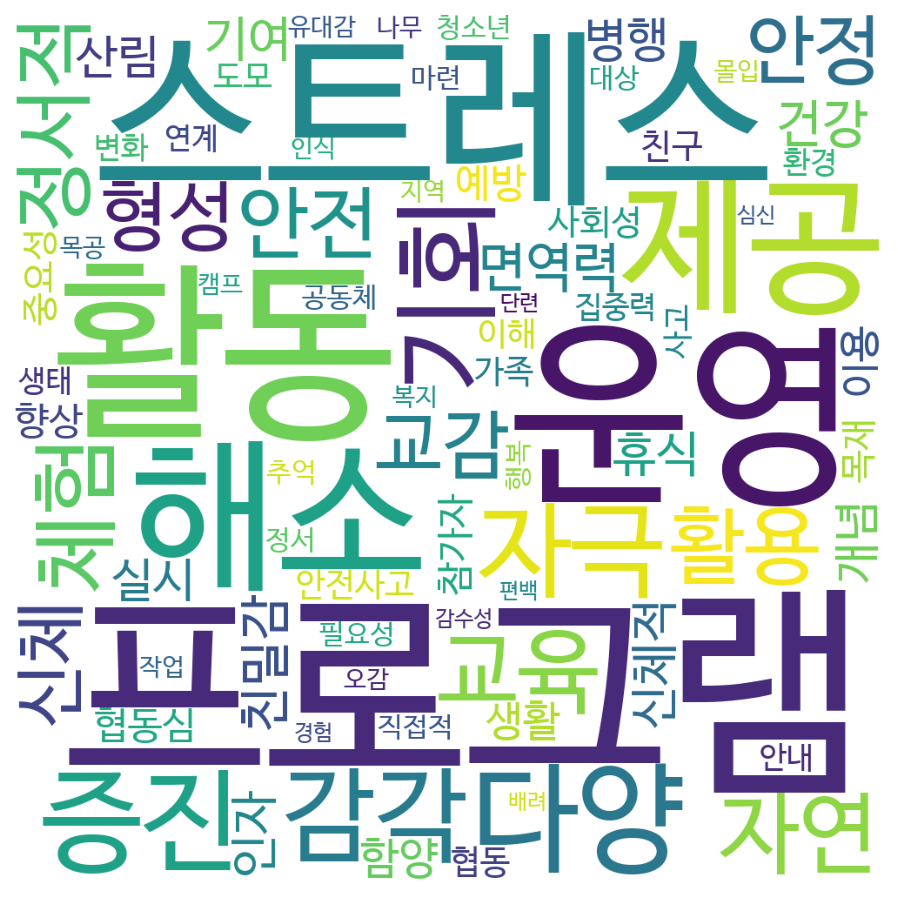

In [ ]:
#빈도를 바탕으로 워드클라우드도 그려볼게요 
#head(100)은 상위 100개 단어를 그려달라는 뜻입니다
#숫자 조정을 통해 표현하고 싶은 단어 갯수를 설정할 수 있어요

from wordcloud import WordCloud
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white', width=1000, height=1000)
cloud = wc.generate_from_frequencies(all_texts.value_counts().head(80))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

#토픽모델링

In [ ]:
#토픽모델링을 해주는 gensim이라는 라이브러리입니다

from gensim import corpora, models
import gensim

In [ ]:
#각 단어에 숫자로 id를 부여합니다

dictionary=corpora.Dictionary(nountexts)

In [ ]:
#그 단어에 대응하는 빈도를 연결해줄거에요

corpus=[dictionary.doc2bow(text) for text in nountexts]

In [ ]:
#LDA 모델을 사용할거에요
#전체적인 문서들을 모두 분석하여 특정 명사가 주요 키워드로 등장할 확률을 바탕으로 자주 같이 등장한 단어들을 묶어 토픽으로 설정해줍니다 
#간단히 말하면, 이 문서들에서 공통적으로, 또 비슷한 맥락에서 같이 혹은 유사하게 사용되는 단어들을 묶어 토픽으로 나타내주는 방식이에요
#결론적으로는, '그래서 이 문서들의 공통된 주요 주장이 무엇이야?' 하는 질문에 답을 줄 수 있는 기법입니다
#num_topics=10은 한 토픽 수를 10개로 지정해 놓았어요. 

ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary)

In [ ]:
#한 토픽당 단어 수는 여기서 바꿀 수 있는데, num_words=10는 한 토픽당 단어 수를 10개로 지정해줍니다

ldamodel.print_topics(num_words=5)

[(0, '0.049*"체험" + 0.047*"진로" + 0.035*"제공" + 0.030*"프로그램" + 0.018*"스트레스"'),
 (1, '0.102*"프로그램" + 0.091*"운영" + 0.035*"다양" + 0.035*"스트레스" + 0.035*"자극"'),
 (2, '0.071*"교육" + 0.071*"안전" + 0.048*"실시" + 0.040*"예방" + 0.040*"안전사고"'),
 (3, '0.055*"이용" + 0.055*"목재" + 0.055*"향상" + 0.041*"해소" + 0.041*"스트레스"'),
 (4, '0.039*"제공" + 0.039*"중요성" + 0.039*"나무" + 0.021*"프로그램" + 0.021*"교육"'),
 (5, '0.076*"프로그램" + 0.074*"운영" + 0.040*"자연" + 0.040*"스트레스" + 0.040*"해소"'),
 (6, '0.044*"기회" + 0.039*"스트레스" + 0.039*"제공" + 0.031*"해소" + 0.031*"다양"'),
 (7, '0.057*"활동" + 0.038*"정서적" + 0.035*"제공" + 0.035*"안정" + 0.032*"증진"'),
 (8, '0.053*"제공" + 0.044*"스트레스" + 0.044*"활용" + 0.039*"기회" + 0.039*"인자"'),
 (9, '0.055*"프로그램" + 0.055*"운영" + 0.037*"체험" + 0.028*"해소" + 0.028*"기회"')]

In [ ]:
#뽑힌 토픽들을 엑셀로 옮겨줄거에요 

topicn=ldamodel.print_topics(num_words=10)

In [ ]:
topn=[]
for doc in topicn:
    for e in doc:
        topn.append(e)

In [ ]:
topn=pd.Series(topn)

In [ ]:
topn=pd.DataFrame(topn)

In [ ]:
topn.to_excel('tpn.xlsx')

#토픽모델링 시각화

In [ ]:
!pip install --upgrade pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 8.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=967d1bb484c10a4414321860897b08f735d7ed3580c8de8468c04b03e9923686
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

In [ ]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.039273 -0.139142       1        1  20.945466
8     -0.024997 -0.056030       2        1  16.200328
1     -0.164531  0.055974       3        1  14.090458
5     -0.181997  0.007835       4        1  12.926787
2      0.127759 -0.149510       5        1  10.833812
6      0.019800 -0.010301       6        1   6.867839
9     -0.080430  0.050825       7        1   6.177041
3      0.102217  0.107914       8        1   4.454079
4      0.132167  0.072532       9        1   3.757232
0      0.109285  0.059901      10        1   3.746957, topic_info=     Term       Freq      Total Category  logprob  loglift
44     운영  42.000000  42.000000  Default  30.0000  30.0000
133    안전  23.000000  23.000000  Default  29.0000  29.0000
28     교육  29.000000  29.000000  Default  28.0000  28.0000
17     체험  25.000000  25.000000  Default  27.0000  27.0000
47   프로그램  61.000000  61.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
34     기회   0.971127  29.304584  Topic10  -3.9914  -0.1228
6      증진   0.971137  29.762942  Topic10  -3.9914  -0.1383
47   프로그램   1.602353  61.038834  Topic10  -3.4907  -0.3558
42     해소   0.971142  37.587810  Topic10  -3.9914  -0.3717
40   스트레스   0.971172  41.305215  Topic10  -3.9914  -0.4660

[493 rows x 6 columns], token_table=      Topic      Freq Term
term                      
206       9  0.523922   가능
117       1  0.285029   가족
117       4  0.142514   가족
117       5  0.285029   가족
117       8  0.142514   가족
...     ...       ...  ...
64        4  0.355527   휴식
64        5  0.071105   휴식
64        7  0.071105   휴식
163       2  0.295799   힐링
163       3  0.591598   힐링

[536 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 2, 6, 3, 7, 10, 4, 5, 1])

In [ ]:
pyLDAvis.save_html(lda_viz, './교육프로그램.html')